In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


## Importing dataset

In [2]:
full_dataset = pd.read_csv("D:/programming/full_datasetpy.csv")
plane_data = pd.read_csv("C:/programming/coursework/data/dataverse_files/plane_data.csv")

In [3]:
test = full_dataset[["Year","Month","DayOfWeek","TailNum",'DepDelay','ArrDelay','Distance','TaxiIn','TaxiOut',"LateAircraftDelay"]]


## Finding age of plane

In [4]:
plane_data = plane_data[["year","tailnum"]]
plane_data.rename(
    columns={"year":"yearofmanu",
                "tailnum":"TailNum"}
          ,inplace=True)
plane_data = plane_data.dropna()
plane_data['yearofmanu']= pd.to_numeric(plane_data['yearofmanu'], errors = 'coerce')                                                    
plane_data = plane_data.loc[(plane_data['yearofmanu'] >= 1956) & (plane_data['yearofmanu']<= 2006)]
plane_data = plane_data[['yearofmanu','TailNum']]

In [5]:
full_dataset = full_dataset.iloc[:,1:]
full_dataset

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,total_delay
0,2005,1,28,5,1603.0,1605,1741.0,1759,UA,541,...,4,23,0,0,0,0,0,0,0,-20.0
1,2005,1,29,6,1559.0,1605,1736.0,1759,UA,541,...,6,15,0,0,0,0,0,0,0,-29.0
2,2005,1,30,7,1603.0,1610,1741.0,1805,UA,541,...,9,18,0,0,0,0,0,0,0,-31.0
3,2005,1,31,1,1556.0,1605,1726.0,1759,UA,541,...,11,10,0,0,0,0,0,0,0,-42.0
4,2005,1,2,7,1934.0,1900,2235.0,2232,UA,542,...,5,10,0,0,0,0,0,0,0,37.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13985533,2006,12,29,5,1246.0,1249,1452.0,1459,DL,1675,...,6,12,0,0,0,0,0,0,0,-10.0
13985534,2006,12,29,5,1225.0,1155,2033.0,1931,DL,1676,...,12,35,0,0,30,0,32,0,0,92.0
13985535,2006,12,29,5,2118.0,2115,2254.0,2241,DL,1676,...,9,27,0,0,0,0,0,0,0,16.0
13985536,2006,12,29,5,2122.0,2127,2209.0,2223,DL,1677,...,5,21,0,0,0,0,0,0,0,-19.0


In [6]:
test = test.merge(plane_data, how = 'right')
test

,Year,Month,DayOfWeek,TailNum,DepDelay,ArrDelay,Distance,TaxiIn,TaxiOut,LateAircraftDelay,yearofmanu
0,2005.0,1.0,1.0,N10156,2.0,-1.0,395.0,3.0,17.0,0.0,2004.0
1,2005.0,1.0,4.0,N10156,10.0,33.0,1117.0,10.0,14.0,10.0,2004.0
2,2005.0,1.0,5.0,N10156,-8.0,11.0,694.0,4.0,30.0,0.0,2004.0
3,2005.0,1.0,4.0,N10156,48.0,42.0,1107.0,7.0,10.0,0.0,2004.0
4,2005.0,1.0,3.0,N10156,-4.0,31.0,540.0,4.0,50.0,0.0,2004.0
...,...,...,...,...,...,...,...,...,...,...,...
10210831,2006.0,12.0,5.0,N999DN,-3.0,1.0,352.0,21.0,7.0,0.0,1992.0
10210832,2006.0,12.0,5.0,N999DN,74.0,71.0,356.0,6.0,18.0,71.0,1992.0
10210833,2006.0,12.0,5.0,N999DN,-2.0,-10.0,352.0,4.0,12.0,0.0,1992.0
10210834,2006.0,12.0,5.0,N999DN,7.0,-8.0,303.0,5.0,11.0,0.0,1992.0


In [7]:
test = test.dropna()

In [8]:
test['Year'] = pd.to_numeric(test['Year'])
test['yearofmanu'] = pd.to_numeric(test['yearofmanu'], errors = 'coerce')
test.dropna()
test = test.loc[test['yearofmanu'] != 0]

In [9]:
test = test.assign(AgeofPlane = lambda x:(test.Year - test.yearofmanu))

In [10]:
test.drop("yearofmanu", axis=1, inplace=True)

## Target variable

In [11]:
test.loc[test['ArrDelay'] <= 0, 'Arrival_Delayed'] = 0
test.loc[test['ArrDelay'] > 0, 'Arrival_Delayed'] = 1
test.dropna()

,Year,Month,DayOfWeek,TailNum,DepDelay,ArrDelay,Distance,TaxiIn,TaxiOut,LateAircraftDelay,AgeofPlane,Arrival_Delayed
0,2005.0,1.0,1.0,N10156,2.0,-1.0,395.0,3.0,17.0,0.0,1.0,0.0
1,2005.0,1.0,4.0,N10156,10.0,33.0,1117.0,10.0,14.0,10.0,1.0,1.0
2,2005.0,1.0,5.0,N10156,-8.0,11.0,694.0,4.0,30.0,0.0,1.0,1.0
3,2005.0,1.0,4.0,N10156,48.0,42.0,1107.0,7.0,10.0,0.0,1.0,1.0
4,2005.0,1.0,3.0,N10156,-4.0,31.0,540.0,4.0,50.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10210831,2006.0,12.0,5.0,N999DN,-3.0,1.0,352.0,21.0,7.0,0.0,14.0,1.0
10210832,2006.0,12.0,5.0,N999DN,74.0,71.0,356.0,6.0,18.0,71.0,14.0,1.0
10210833,2006.0,12.0,5.0,N999DN,-2.0,-10.0,352.0,4.0,12.0,0.0,14.0,0.0
10210834,2006.0,12.0,5.0,N999DN,7.0,-8.0,303.0,5.0,11.0,0.0,14.0,0.0


## Correlation matrix in a heatmap

In [12]:
corrmatrix = test.iloc[:,4:]
corrmatrix = corrmatrix.corr()
corrmatrix

,DepDelay,ArrDelay,Distance,TaxiIn,TaxiOut,LateAircraftDelay,AgeofPlane,Arrival_Delayed
DepDelay,1.000000,0.923448,0.004851,0.018930,0.097472,0.637519,-0.001429,0.403671
ArrDelay,0.923448,1.000000,-0.007904,0.122168,0.337380,0.594625,0.003849,0.544932
Distance,0.004851,-0.007904,1.000000,0.085396,0.115694,-0.010455,0.016119,0.026818
TaxiIn,0.018930,0.122168,0.085396,1.000000,0.015535,0.015380,0.014255,0.132583
TaxiOut,0.097472,0.337380,0.115694,0.015535,1.000000,0.062666,0.000928,0.304705
LateAircraftDelay,0.637519,0.594625,-0.010455,0.015380,0.062666,1.000000,-0.000455,0.239393
AgeofPlane,-0.001429,0.003849,0.016119,0.014255,0.000928,-0.000455,1.000000,0.010516
Arrival_Delayed,0.403671,0.544932,0.026818,0.132583,0.304705,0.239393,0.010516,1.000000


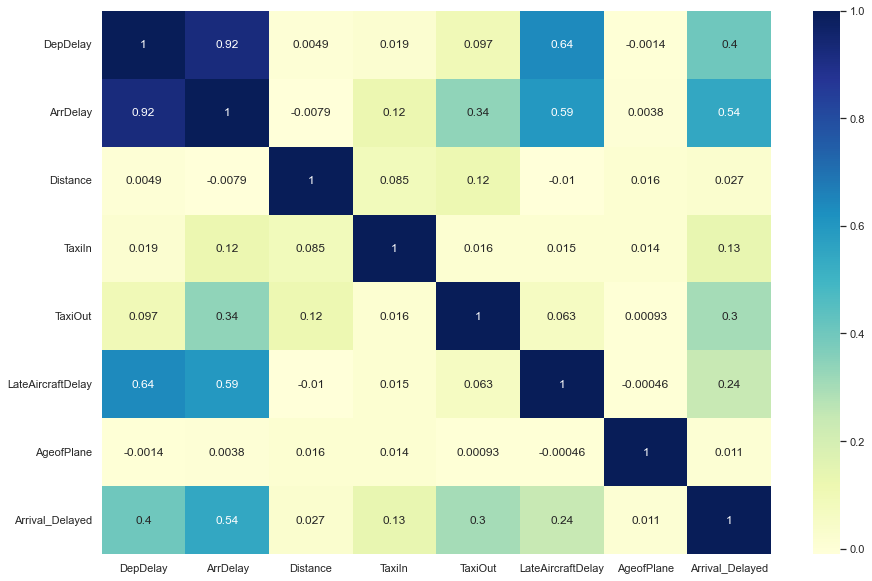

In [13]:
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrmatrix, annot=True ,cmap="YlGnBu")

plt.show()

## Pair Plot

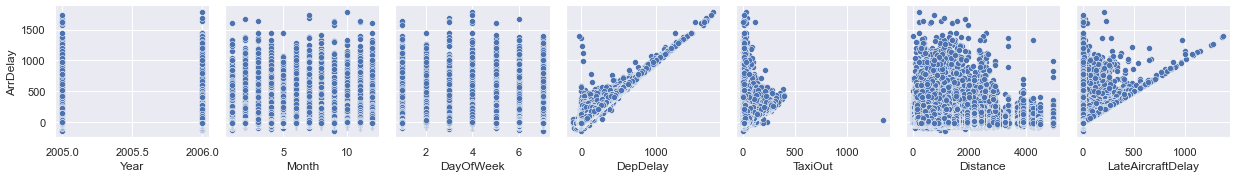

In [15]:
sns.pairplot(data=test,
                  x_vars=['Year','Month', 'DayOfWeek','DepDelay','TaxiOut','Distance','LateAircraftDelay'],
                  y_vars=['ArrDelay'])

## Random subset

In [16]:
subset = test.sample(frac = 0.4 , random_state = 1)
subset

,Year,Month,DayOfWeek,TailNum,DepDelay,ArrDelay,CRSDepTime,Distance,CRSArrTime,TaxiIn,TaxiOut,LateAircraftDelay,AgeofPlane,Arrival_Delayed
4666146,2005.0,3.0,3.0,N578SW,-1.0,-1.0,1425.0,237.0,1437.0,3.0,9.0,0.0,7.0,0.0
4391023,2006.0,6.0,3.0,N550UA,-5.0,5.0,2115.0,2447.0,512.0,4.0,15.0,0.0,14.0,1.0
2740213,2005.0,6.0,1.0,N383DN,-1.0,17.0,815.0,1827.0,1420.0,7.0,21.0,0.0,6.0,1.0
664155,2005.0,3.0,6.0,N14940,0.0,5.0,1850.0,217.0,1949.0,2.0,23.0,0.0,8.0,1.0
4132666,2005.0,9.0,2.0,N517US,-6.0,5.0,1220.0,1750.0,1344.0,7.0,23.0,0.0,19.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9549563,2005.0,2.0,3.0,N947SW,36.0,32.0,600.0,588.0,750.0,9.0,22.0,0.0,2.0,1.0
9032425,2006.0,10.0,7.0,N924FJ,65.0,56.0,1950.0,338.0,2107.0,6.0,13.0,0.0,2.0,1.0
8610228,2005.0,4.0,3.0,N907UA,-4.0,8.0,1200.0,334.0,1322.0,11.0,27.0,0.0,14.0,1.0
6390244,2005.0,12.0,4.0,N688AE,20.0,31.0,1356.0,772.0,1656.0,6.0,28.0,0.0,1.0,1.0


# Model to predict if plane is delayed at arrival 

## categorising data for cleaning and preparation for modelling

In [19]:
features = ['Month', 'DayOfWeek','DepDelay','TaxiOut','Distance','LateAircraftDelay']
numerical_features = ['Distance','TaxiOut','DepDelay','LateAircraftDelay']
categorical_features = ['Month', 'DayOfWeek']

X = subset[features].copy()

In [20]:
numerical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer()), ('scaler', StandardScaler())])

In [21]:
categorical_transformer = Pipeline(steps=[ ('imputer', SimpleImputer()), ('onehot', OneHotEncoder(handle_unknown='ignore'))])

## converting categorical and numerical data to necessary formats

In [22]:
data_transformer = ColumnTransformer(transformers=[('numerical', numerical_transformer, numerical_features),
                                                   ('categorical', categorical_transformer, categorical_features)])

# Building a model

## splitting data into train and test sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, subset.Arrival_Delayed, test_size=0.3, random_state=1)

## training and testing model

In [23]:
pipe_lr = Pipeline(steps=[('data_transformer', data_transformer), ('pipe_lr', LogisticRegression(max_iter=10000))])

In [25]:
param_grid = {
'data_transformer__numerical__imputer__strategy': ['mean', 'median'],
'data_transformer__categorical__imputer__strategy': ['constant','most_frequent']
}

grid_lr = GridSearchCV(pipe_lr, param_grid=param_grid)
grid_lr.fit(X_train, y_train);

In [26]:
pipe_gdb = Pipeline(steps=[('data_transformer', data_transformer), ('pipe_gdb',GradientBoostingClassifier(random_state=2))])

In [27]:
grid_gdb = GridSearchCV(pipe_gdb, param_grid=param_grid)

In [28]:
grid_gdb.fit(X_train, y_train);

## Assessing accuracy of the model

## plotting the ROC curve

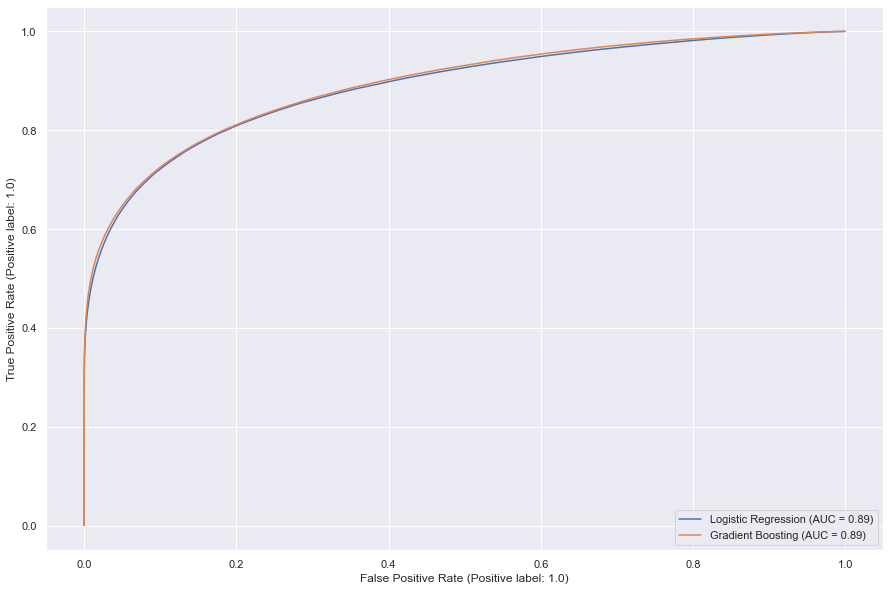

In [30]:
ax = plt.gca()
plot_roc_curve(grid_lr, X_test, y_test, ax=ax, name='Logistic Regression') 
plot_roc_curve(grid_gdb, X_test, y_test, ax=ax, name='Gradient Boosting')
plt.savefig('ML Curve.png')
plt.show()


## Confusion matrix

<AxesSubplot:>

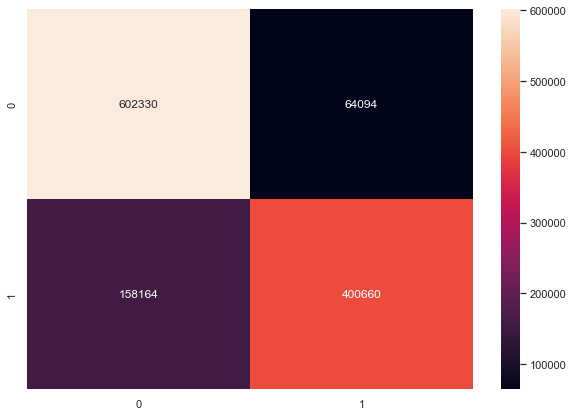

In [31]:
from sklearn.metrics import confusion_matrix
y_pred = grid_lr.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

plt.figure(figsize = (10,7))
sns.heatmap(confusion_matrix, annot=True, fmt = 'g' )

## Accuracy of the model

In [33]:
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_pred)
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

         0.0       0.79      0.90      0.84    666424
         1.0       0.86      0.72      0.78    558824

    accuracy                           0.82   1225248
   macro avg       0.83      0.81      0.81   1225248
weighted avg       0.82      0.82      0.82   1225248



In [32]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8186016218757346